# Read All Dataset CSV

In [1]:
import os
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_names=[]
X_trains=[]
y_trains=[]
X_tests=[]

# 收集所有資料夾名稱，按照數字順序排序資料夾名稱
for folder_name in os.listdir("./Competition_data"):
    dataset_names.append(folder_name)
dataset_names = sorted(dataset_names, key=lambda x: int(re.search(r'\d+', x).group()))

for folder_name in dataset_names:
    # print(folder_name)
    X_trains.append(pd.read_csv(f"./Competition_data/{folder_name}/X_train.csv",header=0))
    y_trains.append(pd.read_csv(f"./Competition_data/{folder_name}/y_train.csv",header=0))
    X_tests.append(pd.read_csv(f"./Competition_data/{folder_name}/X_test.csv",header=0))
    
    
    
# print(len(dataset_names))
# print(len(X_trains))  # 49, 代表有 49 個 dataFrame (每個資料集各一個)
# print(len(y_trains))
# print(len(X_tests))
# print(X_trains[0].dtypes)
# print(y_trains[0].dtypes)

# Data Analysis
根據正負樣本分析，使用重新採樣(SMOTE)，並且只針對過於失衡的樣本重新採樣，避免模型解釋性失真

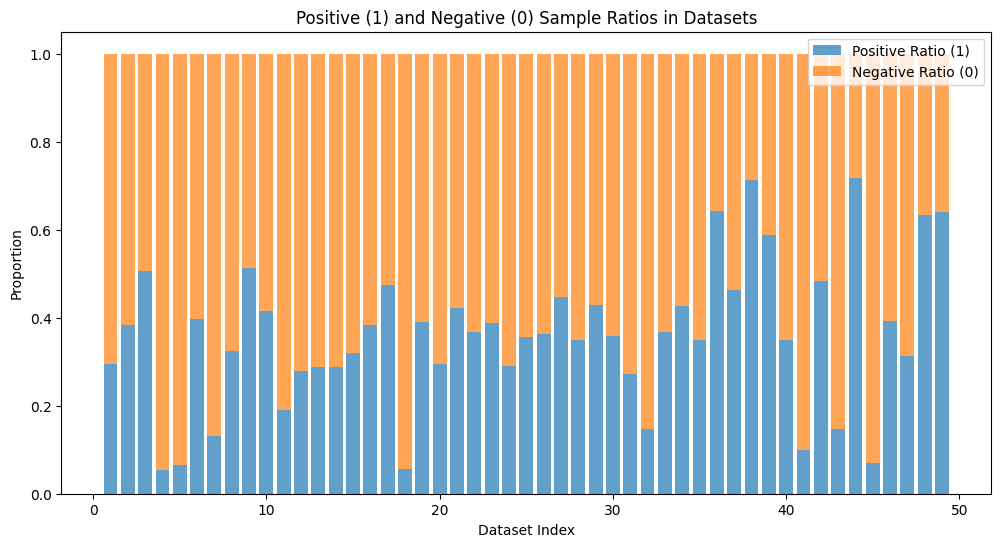

In [3]:
for i, y_train in enumerate(y_trains):
    positive_samples = sum(y_train.values.ravel() == 1)
    negative_samples = sum(y_train.values.ravel() == 0)
    total_samples = positive_samples + negative_samples
    # print(f"Dataset {i + 1}:")
    # print(f"  Total samples: {total_samples}")
    # print(f"  Positive samples: {positive_samples} ({positive_samples / total_samples:.2%})")
    # print(f"  Negative samples: {negative_samples} ({negative_samples / total_samples:.2%})\n")


positive_ratios = []
negative_ratios = []

for y_train in y_trains:
    positive = sum(y_train.values.ravel() == 1)
    total = len(y_train)
    positive_ratios.append(positive / total)
    negative_ratios.append(1 - (positive / total))

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(positive_ratios) + 1), positive_ratios, label="Positive Ratio (1)", alpha=0.7)
plt.bar(range(1, len(negative_ratios) + 1), negative_ratios, bottom=positive_ratios, label="Negative Ratio (0)", alpha=0.7)
plt.xlabel("Dataset Index")
plt.ylabel("Proportion")
plt.title("Positive (1) and Negative (0) Sample Ratios in Datasets")
plt.legend()
plt.show()



In [4]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# for i, y_train in enumerate(y_trains):
#     if sum(y_train.values.ravel() == 1) < 0.1 * len(y_trains[i]) or sum(y_train.values.ravel() == 0) < 0.1 * len(y_trains[i]):
#         X_trains[i], y_trains[i] = smote.fit_resample(X_trains[i], y_trains[i].values.ravel())
#         print(f'resample dataset {i+1}')

## Data Preprocessing & Feature Engineering
我們試了許多方法，如xgboost 選擇importance，PCA降維度， PYOD 的 IForest 檢測異常值，one hot encoding...等結果比什麼都不做來的差

In [5]:

# from sklearn.preprocessing import OneHotEncoder
# from xgboost import XGBClassifier
# from pyod.models.iforest import IForest
# import pandas as pd
# import numpy as np
# from collections import Counter

# for i in range(len(dataset_names)):
#     # Step 1: 分離數值型和類別型特徵
#     numerical_df = X_trains[i].select_dtypes(include=['float'])  # 數值型特徵
#     categorical_df = X_trains[i].select_dtypes(include=['int'])  # 類別型特徵

#     y_array = y_trains[i].values.ravel()  # 將 DataFrame 轉為一維陣列
#     minority_count_1 = Counter(y_array)[1]
#     minority_count_0 = Counter(y_array)[0]
#     print(minority_count_1, minority_count_0)

    
#     if minority_count_0 > 5 and minority_count_1 > 5:
#         # Step 2: 使用 PYOD 的 IForest 檢測初始異常值
#         pyod_clf = IForest(contamination=0.1, random_state=42)  # 假設 10% 異常
#         pyod_clf.fit(numerical_df.values)
#         initial_outliers = pyod_clf.predict(numerical_df.values)  # 1 表示異常，0 表示正常

#         # Step 3: 將初始檢測結果作為 XGBoost 的訓練標籤
#         xgb_clf = XGBClassifier(
#             n_estimators=50,
#             random_state=42,

#             eval_metric="logloss",
#         )
#         xgb_clf.fit(numerical_df, initial_outliers)

#         # Step 4: 使用 XGBoost 預測訓練數據中的異常值
#         final_outliers = xgb_clf.predict(numerical_df)
        
#         # Step 5: 過濾異常值
#         is_normal = (final_outliers == 0)  # XGBoost 中 0 表示正常
#         numerical_df = numerical_df[is_normal].reset_index(drop=True)
#         categorical_df = categorical_df[is_normal].reset_index(drop=True)
#         y_trains[i] = y_trains[i].iloc[is_normal].reset_index(drop=True)

#     # Step 6: 對類別型特徵進行 One-Hot 編碼
#     encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#     categorical_encoded = encoder.fit_transform(categorical_df)
#     categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

#     # 合併處理後的數據
#     X_trains[i] = pd.concat([numerical_df, categorical_df], axis=1)

#     # Step 7: 對測試數據進行相同處理
#     numerical_df_test = X_tests[i].select_dtypes(include=['float'])
#     categorical_df_test = X_tests[i].select_dtypes(include=['int'])

#     if minority_count_0 > 5 and minority_count_1 > 5:
#         # 使用 XGBoost 預測測試數據中的異常值
#         test_outliers = xgb_clf.predict(numerical_df_test)
#         is_test_normal = (test_outliers == 0)
#         numerical_df_test = numerical_df_test[is_test_normal].reset_index(drop=True)
#         categorical_df_test = categorical_df_test[is_test_normal].reset_index(drop=True)

#     # 使用已訓練的 One-Hot Encoder 處理類別型特徵
#     categorical_encoded_test = encoder.transform(categorical_df_test)
#     categorical_df_test = pd.DataFrame(categorical_encoded_test, columns=encoder.get_feature_names_out())

#     # 合併測試數據
#     X_tests[i] = pd.concat([numerical_df_test, categorical_df_test], axis=1)


## MODEL 
XGBoost為主要訓練model <br>
然後把準確率低的值重新用CV 調參數


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import json
from sklearn.metrics import roc_auc_score

### 將大家的參數存入JSON中，

In [7]:
import json

# 加載現有的參數文件
try:
    with open('best_params.json', 'r') as file:
        best_params = json.load(file)
except FileNotFoundError:
    # 如果文件不存在，初始化一個空字典
    best_params = {}

for i in range(len(dataset_names)):
    best_params.setdefault(f"dataset_{i+1}", {"auc": 0, "params": {}})
    # 保存更新後的 JSON 文件
with open('best_params.json', 'w') as file:
    json.dump(best_params, file, indent=4)

In [8]:
# sum(y_trains[17].values.ravel() == 0)

In [9]:

models=[]
retrain_index = []
avg_auc = 0
avg_train = 0
smote = SMOTE(random_state=42)
bad_threshold = 0.7
params = {
    "n_estimators": 700,
    "eta": 0.008,
    "gamma": 0.95,
    "scale_pos_weight": 2,
    "max_depth": 15,
    "subsample": 0.7,
    "colsample_bytree": 0.6,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "reg_lambda": 1,            # L2 regularization term on weights
    "alpha": 0.1                # L1 regularization term on weights
}

for i in range(len(dataset_names)):
    tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
        X_trains[i], y_trains[i], test_size=0.2, random_state=42, 
    )
    if sum(tmp_y_train.values.ravel() == 1) < 0.2 * len(tmp_y_train) or sum(tmp_y_train.values.ravel() == 0) < 0.2 * len(tmp_y_train):
        tmp_X_train,tmp_y_train = smote.fit_resample(tmp_X_train, tmp_y_train)

    model = XGBClassifier( **params)
    model.fit(tmp_X_train, tmp_y_train.squeeze())
    
    
    tmp_y_prob = model.predict_proba(tmp_X_test)[:, 1]
    auc = roc_auc_score(tmp_y_test, tmp_y_prob)
    if(auc < bad_threshold):            # 如果 AUC 太低，就將這個資料集的 index 存起來，等等重新訓練
        retrain_index.append(i)
        print(f"\033[31mAUC for dataset {i+1} with tuned parameters: {auc}\033[0m") 
    else:
        print(f"AUC for dataset {i+1} with tuned parameters: {auc}")
    avg_auc += auc
    models.append(model)
    #將參數存入 JSON 文件
    if auc >= best_params[f"dataset_{i+1}"]["auc"]:
        best_params[f"dataset_{i+1}"]["auc"] = auc
        best_params[f"dataset_{i+1}"]["params"].update(params)
    with open('best_params.json', 'w') as file:
        json.dump(best_params, file, indent=4)

        
print(f"avg auc :   {avg_auc / len(dataset_names)}")



AUC for dataset 1 with tuned parameters: 0.8527815468113975
AUC for dataset 2 with tuned parameters: 0.9995215311004786
AUC for dataset 3 with tuned parameters: 0.8125
AUC for dataset 4 with tuned parameters: 0.44693877551020406
AUC for dataset 5 with tuned parameters: 0.9066666666666667
AUC for dataset 6 with tuned parameters: 0.9571428571428572
AUC for dataset 7 with tuned parameters: 0.9786780383795309
AUC for dataset 8 with tuned parameters: 0.9454545454545453
AUC for dataset 9 with tuned parameters: 0.8846153846153846
AUC for dataset 10 with tuned parameters: 0.8074592074592075
AUC for dataset 11 with tuned parameters: 0.2857142857142857
AUC for dataset 12 with tuned parameters: 0.9761904761904762
AUC for dataset 13 with tuned parameters: 0.9566666666666667
AUC for dataset 14 with tuned parameters: 1.0
AUC for dataset 15 with tuned parameters: 0.7716666666666666
AUC for dataset 16 with tuned parameters: 0.9995215311004786
AUC for dataset 17 with tuned parameters: 0.925925925925925

#### 把準確率低的抓出來重新訓練

考量要跑很久，我們有直接將訓練好的參數記錄在best_params.json

如果要自己逐步調整(一次調一兩個參數，要把下面xgboost 同樣名字的參數註解掉才不會衝突)

In [10]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# param_grid = {
    
#     # 'learning_rate': [0.005, 0.01,0.05,0.1],
#     # 'n_estimators': [300,400,500],         #500 400 is mostly good 
#     # 'max_depth': [ 2,3,5,6, 7,9,10,12],
#     # 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
#     # 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#     # 'alpha': [0.01,0.1, 0.5,1.5,],
#     # 'reg_lambda': [0.01,0.1, 0.5,2],
#     # 'gamma': [0.1,0.8, 0.95, 1, 1.5,],
#     # 'scale_pos_weight' : [1,2,3,5],
# }
# print(retrain_index)

# for i in retrain_index:
#     tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
#         X_trains[i], y_trains[i], test_size=0.2, random_state=42, 
#     )
#     tmp_X_train,tmp_y_train = smote.fit_resample(tmp_X_train, tmp_y_train)
#     model = XGBClassifier(
#     #     n_estimators=700, 
#     #     eta=0.008,
        
#     #     # gamma=0.95,    # 1 is best
#     #     min_child_weight = 2,
#     #     # scale_pos_weight=2,
#     #     max_depth=15, 
#     #     subsample=0.5, 
#     #     colsample_bytree=0.9,
#     #     objective='binary:logistic',
#     #     eval_metric='logloss',
#     #     # reg_lambda=1,     # L2 regularization term on weights
#     #     # alpha=0.1         # L1 regularization term on weights
#     **best_params.get(f"dataset_{i+1}", {}).get("params", {})  # Load the best parameters from the JSON file
#     )
        
    
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
#     grid_search.fit(tmp_X_train, tmp_y_train.squeeze())
   
#     # Get the best model from cross-validation
#     best_model = grid_search.best_estimator_
    
#     print(f"Best parameters for dataset {i+1}: {grid_search.best_params_}")

#     # Evaluate the best model
#     tmp_y_prob = best_model.predict_proba(tmp_X_test)[:, 1]
   
#     auc = roc_auc_score(tmp_y_test, tmp_y_prob)
#     #Save the best parameters to JSON
#     # 更新或追加參數(if auc better)
#     # if auc >= best_params.get(f"dataset_{i+1}", {}).get('auc', 0):
#     #     print(f"\033[32mAUC for dataset {i+1} with tuned parameters: {auc}\033[0m")
#     #     best_params[f"dataset_{i+1}"]['auc'] = auc

#     #     if f"dataset_{i+1}" in best_params:
#     #         best_params[f"dataset_{i+1}"]["params"].update(grid_search.best_params_)
#     #     else:
#     #         best_params[f"dataset_{i+1}"]["params"]  = grid_search.best_params_
#     # else:
#     print(f"AUC for retrain dataset {i+1} with tuned parameters: {auc}")
#     # Save the best parameters to a JSON file
    
# with open('best_params.json', 'w') as file:
#     json.dump(best_params, file, indent=4)


In [11]:
##最後重新train model by best params

# 讀取現有 JSON 文件
with open('best_params.json', 'r') as file:
    best_params = json.load(file)

models=[]
avg_auc = 0
avg_train = 0

for i in range(len(dataset_names)):
  
    tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
        X_trains[i], y_trains[i], test_size=0.2, random_state=42, 
    )
    tmp_X_train,tmp_y_train = smote.fit_resample(tmp_X_train, tmp_y_train)
    model = XGBClassifier(
        **best_params.get(f"dataset_{i+1}", {}).get("params", {}),  # Load the best parameters from the JSON file
    )
    model.fit(tmp_X_train, tmp_y_train.squeeze())
    
   
    tmp_y_prob = model.predict_proba(tmp_X_test)[:, 1]
    auc = roc_auc_score(tmp_y_test, tmp_y_prob)
    print(f'auc of dataset {i+1}: \t{auc}')
    avg_auc += auc
    models.append(model)
        
print(f"avg auc :   {avg_auc / len(dataset_names)}")
# print(f"avg auc of maxdeep of {max_deep}:   {avg_auc / len(dataset_names)}")


auc of dataset 1: 	0.8514246947082769
auc of dataset 2: 	0.9995215311004785
auc of dataset 3: 	0.7916666666666667
auc of dataset 4: 	0.44693877551020406
auc of dataset 5: 	0.9066666666666667
auc of dataset 6: 	0.9551020408163265
auc of dataset 7: 	0.9786780383795309
auc of dataset 8: 	0.9418181818181819
auc of dataset 9: 	0.8942307692307693
auc of dataset 10: 	0.7934731934731934
auc of dataset 11: 	0.4285714285714286
auc of dataset 12: 	0.9904761904761904
auc of dataset 13: 	0.96
auc of dataset 14: 	1.0
auc of dataset 15: 	0.7583333333333332
auc of dataset 16: 	0.9995215311004785
auc of dataset 17: 	0.9259259259259259
auc of dataset 18: 	1.0
auc of dataset 19: 	0.9920634920634921
auc of dataset 20: 	0.9575757575757575
auc of dataset 21: 	0.993006993006993
auc of dataset 22: 	0.869281045751634
auc of dataset 23: 	0.947695035460993
auc of dataset 24: 	0.6251709986320109
auc of dataset 25: 	1.0
auc of dataset 26: 	0.8461538461538461
auc of dataset 27: 	1.0
auc of dataset 28: 	0.8564516129

## Inference Model

In [12]:
##給xgboost用
y_predicts=[]
for i in range(len(dataset_names)):
    # print(X_tests[i])
    y_predict_proba=models[i].predict_proba(X_tests[i])[:, 1]
    df = pd.DataFrame(y_predict_proba, columns=['y_predict_proba'])
    y_predicts.append(df)
    

## Save result

In [13]:
for idx,dataset_name in enumerate(dataset_names):
    df=y_predicts[idx]
    df.to_csv(f'./Competition_data/{dataset_name}/y_predict.csv', index=False,header=True)